In [2]:
import collections
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import layers

Подробнее про рекурентные нейросети: https://habr.com/ru/post/487808/

Подробнее про LSTM: https://neurohive.io/ru/osnovy-data-science/lstm-nejronnaja-set/

Хороший пример генерации текста: https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/text_generation_wikipedia_rnn/text_generation_wikipedia_rnn.ipynb#scrollTo=CHkz0ZHA0-Lz

RNN:

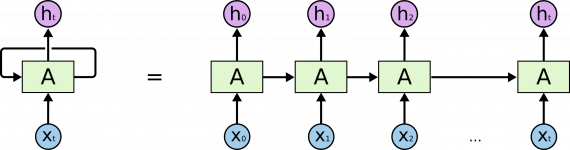

SimpleRNN:

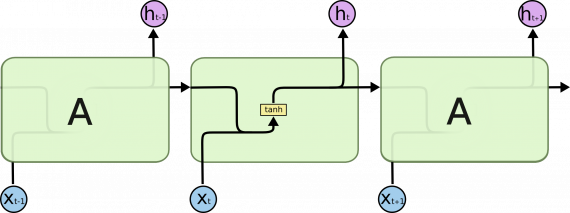

LSTM:

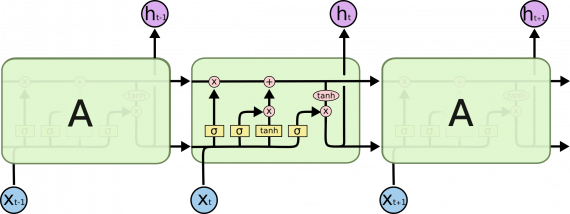

«Я вырос во Франции … Я свободно говорю на ***французском»***

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
batch_size = 64
# Каждый пакет изображений MNIST это тензор размерностью (batch_size, 28, 28).
# Каждая входная последовательность размера (28, 28) (высота рассматривается как время).
input_dim = 28

units = 64
output_size = 10  # метки от 0 до 9

# Построим RNN модель
def build_model(allow_cudnn_kernel=True):
  # CuDNN доступен только на уровне слоя, а не на уровне ячейки.
  # Это значит `LSTM(units)` будет использовать ядро CuDNN,
  # тогда как RNN(LSTMCell(units)) будет использовать non-CuDNN ядро.
  if allow_cudnn_kernel:
    # Слой LSTM с параметрами по умолчанию использует CuDNN.
    lstm_layer = tf.keras.layers.LSTM(units, input_shape=(None, input_dim))
  else:
    # Обертка LSTMCell слоем RNN не будет использовать CuDNN.
    lstm_layer = tf.keras.layers.RNN(
        tf.keras.layers.LSTMCell(units),
        input_shape=(None, input_dim))
    model = tf.keras.models.Sequential([
      lstm_layer,
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size)]
  )
  return model

In [9]:
model = build_model(allow_cudnn_kernel=False)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='sgd',
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=5)

Epoch 1/5
938/938 [==============================] - 22s 22ms/step - loss: 0.9482 - accuracy: 0.7041 - val_loss: 0.5023 - val_accuracy: 0.8477
Epoch 2/5
938/938 [==============================] - 21s 22ms/step - loss: 0.3945 - accuracy: 0.8821 - val_loss: 0.3130 - val_accuracy: 0.8972
Epoch 3/5
532/938 [================>.............] - ETA: 8s - loss: 0.2766 - accuracy: 0.9155

KeyboardInterrupt: ignored

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2031 - accuracy: 0.9345


[0.2031394988298416, 0.934499979019165]

In [11]:
import tensorflow_datasets as tfds
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [12]:
DATASET_NAME = 'wikipedia/20190301.en'

dataset, dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    split=tfds.Split.TRAIN,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/258 [00:00<?, ? file/s]


Dataset wikipedia downloaded and prepared to tmp/wikipedia/20190301.en/1.0.0. Subsequent calls will reuse this data.


In [ ]:
print(dataset_info)
print(dataset)

tfds.core.DatasetInfo(
    name='wikipedia',
    version=1.0.0,
    description='Wikipedia dataset containing cleaned articles of all languages.
The datasets are built from the Wikipedia dump
(https://dumps.wikimedia.org/) with one split per language. Each example
contains the content of one full Wikipedia article with cleaning to strip
markdown and unwanted sections (references, etc.).',
    homepage='https://dumps.wikimedia.org',
    features=FeaturesDict({
        'text': Text(shape=(), dtype=tf.string),
        'title': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=5824596,
    splits={
        'train': 5824596,
    },
    supervised_keys=None,
    citation="""@ONLINE {wikidump,
        author = "Wikimedia Foundation",
        title  = "Wikimedia Downloads",
        url    = "https://dumps.wikimedia.org"
    }""",
    redistribution_info=license: "This work is licensed under the Creative Commons Attribution-ShareAlike 3.0 Unported License. To view a copy of this l

In [ ]:
TRAIN_NUM_EXAMPLES = dataset_info.splits['train'].num_examples
print('Total number of articles: ', TRAIN_NUM_EXAMPLES)

Total number of articles:  5824596


In [ ]:
print('First article','\n======\n')
for example in dataset.take(1):
    print('Title:','\n------')
    print(example['title'].numpy().decode('utf-8'))
    print()

    print('Text:', '\n------')
    print(example['text'].numpy().decode('utf-8'))

First article 

Title: 
------
Joseph Greenberg

Text: 
------
Joseph Harold Greenberg (May 28, 1915 – May 7, 2001) was an American linguist, known mainly for his work concerning linguistic typology and the genetic classification of languages.

Life

Early life and education 
(Main source: Croft 2003)

Joseph Greenberg was born on May 28, 1915 to Jewish parents in Brooklyn, New York. His first great interest was music. At the age of 14, he gave a piano concert in Steinway Hall. He continued to play the piano frequently throughout his life.

After finishing high school, he decided to pursue a scholarly career rather than a musical one. He enrolled at Columbia University in New York. During his senior year, he attended a class taught by Franz Boas concerning American Indian languages. With references from Boas and Ruth Benedict, he was accepted as a graduate student by Melville J. Herskovits at Northwestern University in Chicago. During the course of his graduate studies, Greenberg did f

Теперь давайте сгладим данные и преобразуем текст в набор символов.

In [ ]:
def article_to_text(text):
    return np.array([char for char in text.numpy().decode('utf-8')])

# Converting each dataset item to a string ('text') instead of a dictionary ({'text', 'title'}).
dataset_text = dataset.map(
    lambda article: tf.py_function(func=article_to_text, inp=[article['text']], Tout=tf.string)
)

for text in dataset_text.take(2):
    print(text.numpy())
    print('\n')

[b'J' b'o' b's' ... b'n' b't' b's']


[b'P' b'a' b'u' ... b'e' b'r' b's']




In [ ]:
# Unbatch the text dataset into a more granular char dataset.
# Now each dataset item is one character instead of a big piece of text.
dataset_chars = dataset_text.unbatch()

for char in dataset_chars.take(20):
    print(char.numpy().decode('utf-8'))

J
o
s
e
p
h
 
H
a
r
o
l
d
 
G
r
e
e
n
b


**Создаем словарь**

In [ ]:
vocab = set()

# Ideally we should take all dataset items into account here.
for text in dataset_text.take(1000):
    vocab.update([char.decode('utf-8') for char in text.numpy()])
    
vocab = sorted(vocab)

print('Unique characters: {}'.format(len(vocab)))
print('vocab:')
print(vocab)

Unique characters: 621
vocab:
['\t', '\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\xa0', '£', '§', '«', '®', '°', '±', '²', '·', '»', '¼', '½', '¿', 'Á', 'Å', 'Æ', 'Ç', 'É', 'Ë', 'Í', 'Î', 'Ó', 'Ö', '×', 'Ø', 'Ü', 'Þ', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ú', 'û', 'ü', 'ý', 'ā', 'ă', 'ą', 'Ć', 'ć', 'Č', 'č', 'đ', 'ė', 'ę', 'ě', 'ğ', 'ġ', 'Ħ', 'ī', 'İ', 'ı', 'ļ', 'Ł', 'ł', 'ń', 'ň', 'Ō', 'ō', 'ő', 'ř', 'Ś', 'ś', 'Ş', 'ş', 'Š', 'š', 'ţ', 'ū', 'ź', 'ż', 'Ž', 'ž', 'ơ', 'ư', 'ǔ', 'ș',

**Векторизируем текст**

Перед подачей текста в нашу RNN нам нужно преобразовать текст из последовательности символов в последовательность чисел. Для этого мы обнаружим все уникальные символы в тексте, сформируем из него словарь и заменим каждый символ его индексом в словаре.

In [ ]:
# Map characters to their indices in vocabulary.
char2index = {char: index for index, char in enumerate(vocab)}

print('{')
for char, _ in zip(char2index, range(30)):
    print('  {:4s}: {:3d},'.format(repr(char), char2index[char]))
print('  ...\n}')

{
  '\t':   0,
  '\n':   1,
  ' ' :   2,
  '!' :   3,
  '"' :   4,
  '#' :   5,
  '$' :   6,
  '%' :   7,
  '&' :   8,
  "'" :   9,
  '(' :  10,
  ')' :  11,
  '*' :  12,
  '+' :  13,
  ',' :  14,
  '-' :  15,
  '.' :  16,
  '/' :  17,
  '0' :  18,
  '1' :  19,
  '2' :  20,
  '3' :  21,
  '4' :  22,
  '5' :  23,
  '6' :  24,
  '7' :  25,
  '8' :  26,
  '9' :  27,
  ':' :  28,
  ';' :  29,
  ...
}


In [ ]:
# Map character indices to characters from vacabulary.
index2char = np.array(vocab)

print(index2char)

['\t' '\n' ' ' '!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/'
 '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' 'A'
 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S'
 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' '[' ']' '^' '_' '`' 'a' 'b' 'c' 'd' 'e' 'f'
 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x'
 'y' 'z' '{' '|' '}' '~' '\xa0' '£' '§' '«' '®' '°' '±' '²' '·' '»' '¼'
 '½' '¿' 'Á' 'Å' 'Æ' 'Ç' 'É' 'Ë' 'Í' 'Î' 'Ó' 'Ö' '×' 'Ø' 'Ü' 'Þ' 'ß' 'à'
 'á' 'â' 'ã' 'ä' 'å' 'æ' 'ç' 'è' 'é' 'ê' 'ë' 'ì' 'í' 'î' 'ï' 'ñ' 'ò' 'ó'
 'ô' 'õ' 'ö' 'ø' 'ú' 'û' 'ü' 'ý' 'ā' 'ă' 'ą' 'Ć' 'ć' 'Č' 'č' 'đ' 'ė' 'ę'
 'ě' 'ğ' 'ġ' 'Ħ' 'ī' 'İ' 'ı' 'ļ' 'Ł' 'ł' 'ń' 'ň' 'Ō' 'ō' 'ő' 'ř' 'Ś' 'ś'
 'Ş' 'ş' 'Š' 'š' 'ţ' 'ū' 'ź' 'ż' 'Ž' 'ž' 'ơ' 'ư' 'ǔ' 'ș' 'ț' 'ɔ' 'ə' 'ɛ'
 'ʷ' 'ʼ' 'ʿ' '˚' 'Ι' 'Π' 'α' 'β' 'ε' 'η' 'ι' 'κ' 'μ' 'ο' 'ρ' 'ς' 'τ' 'υ'
 'χ' 'ψ' 'ό' 'Б' 'В' 'Д' 'Ж' 'З' 'И' 'К' 'Л' 'М' 'Н' 'О' 'П' 'С' 'У' 'Ф'
 'Х' 'а' 'б' 'в' 'г' 'д' 'е' 'з' 'и' 'й' 'к' 'л' '

In [ ]:
def char_to_index(char):
    char_symbol = char.numpy().decode('utf-8')
    char_index = char2index[char_symbol] if char_symbol in char2index else char2index['?']
    return char_index

dataset_chars_indexed = dataset_chars.map(
    lambda char: tf.py_function(func=char_to_index, inp=[char], Tout=tf.int32)
)

print('ORIGINAL CHARS:', '\n---')
for char in dataset_chars.take(10):
    print(char.numpy().decode())

print('\n\n')    
    
print('INDEXED CHARS:', '\n---')
for char_index in dataset_chars_indexed.take(20):
    print(char_index.numpy())

ORIGINAL CHARS: 
---
J
o
s
e
p
h
 
H
a
r



INDEXED CHARS: 
---
44
80
84
70
81
73
2
42
66
83
80
77
69
2
41
83
70
70
79
67


**Создаем обучающие последовательности**

In [ ]:
# The maximum length sentence we want for a single input in characters.
sequence_length = 200

In [ ]:
# Generate batched sequences out of the char_dataset.
sequences = dataset_chars_indexed.batch(sequence_length + 1, drop_remainder=True)

# Sequences examples.
for item in sequences.take(10):
    print(repr(''.join(index2char[item.numpy()])))
    print()

'Joseph Harold Greenberg (May 28, 1915 – May 7, 2001) was an American linguist, known mainly for his work concerning linguistic typology and the genetic classification of languages.\n\nLife\n\nEarly life an'

'd education \n(Main source: Croft 2003)\n\nJoseph Greenberg was born on May 28, 1915 to Jewish parents in Brooklyn, New York. His first great interest was music. At the age of 14, he gave a piano concert '

'in Steinway Hall. He continued to play the piano frequently throughout his life.\n\nAfter finishing high school, he decided to pursue a scholarly career rather than a musical one. He enrolled at Columbia'

' University in New York. During his senior year, he attended a class taught by Franz Boas concerning American Indian languages. With references from Boas and Ruth Benedict, he was accepted as a graduat'

'e student by Melville J. Herskovits at Northwestern University in Chicago. During the course of his graduate studies, Greenberg did fieldwork among the Hausa people of Ni

sequences shape:
Each sequence of length 201 

#    201     201          201
# [(.....) (.....) ...  (.....)] 

**Каждую последовательность продублируем и сдвинем, чтобы сформировать входной и целевой текст. Например, предположим, что sequence_length равно 4, а наш текст - Hello. Входной последовательностью будет Hell, а целевой последовательностью - ello.**

In [ ]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [ ]:
dataset_sequences = sequences.map(split_input_target)
for input_example, target_example in dataset_sequences.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    print('Input:\n', repr(''.join(index2char[input_example.numpy()])))
    print()
    print('Target:\n', repr(''.join(index2char[target_example.numpy()])))

Input sequence size: 200
Target sequence size: 200

Input:
 'Joseph Harold Greenberg (May 28, 1915 – May 7, 2001) was an American linguist, known mainly for his work concerning linguistic typology and the genetic classification of languages.\n\nLife\n\nEarly life a'

Target:
 'oseph Harold Greenberg (May 28, 1915 – May 7, 2001) was an American linguist, known mainly for his work concerning linguistic typology and the genetic classification of languages.\n\nLife\n\nEarly life an'


In [ ]:
# dataset shape:
# - Each sequence is a tuple of 2 sub-sequences of length 100 (input_text and target_text)
#
#    200       200           200
# /(.....)\ /(.....)\ ... /(.....)\  <-- input_text
# \(.....)/ \(.....)/     \(.....)/  <-- target_text

**Каждый индекс этих векторов обрабатывается как один временной шаг. Для ввода на временном шаге 0 модель получает индекс для «F» и пытается предсказать индекс для «i» в качестве следующего символа. На следующем временном шаге он делает то же самое, но RNN учитывает контекст предыдущего шага в дополнение к текущему входному символу.**

In [ ]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print('Step #{:1d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(index2char[target_idx])))
    print()

Step #0
  input: 44 ('J')
  expected output: 80 ('o')

Step #1
  input: 80 ('o')
  expected output: 84 ('s')

Step #2
  input: 84 ('s')
  expected output: 70 ('e')

Step #3
  input: 70 ('e')
  expected output: 81 ('p')

Step #4
  input: 81 ('p')
  expected output: 73 ('h')



# Разделим обучающие последовательности на батчи
Мы использовали tf.data, чтобы разбить текст на управляемые последовательности. Но прежде чем вводить эти данные в модель, нам нужно перетасовать данные и упаковать их в пакеты.

In [ ]:
# Batch size.
BATCH_SIZE = 64

# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
BUFFER_SIZE = 100

# How many items to prefetch before the next iteration.
PREFETCH_SIZE = 10

dataset_sequence_batches = dataset_sequences \
    .shuffle(BUFFER_SIZE) \
    .batch(BATCH_SIZE, drop_remainder=True) \
    .prefetch(PREFETCH_SIZE)

dataset_sequence_batches

<PrefetchDataset shapes: (<unknown>, <unknown>), types: (tf.int32, tf.int32)>

In [ ]:
for input_text, target_text in dataset_sequence_batches.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[74 79 84 ... 77 74 84]
 [69  2 70 ... 70 83 85]
 [28 49 71 ... 85 83 66]
 ...
 [84 66  2 ... 66 77 70]
 [64 35 79 ... 68  2 86]
 [74 77 74 ... 84  2 68]], shape=(64, 200), dtype=int32)

1st batch: target_text: tf.Tensor(
[[79 84  2 ... 74 84 85]
 [ 2 70 69 ... 83 85  2]
 [49 71 71 ... 83 66 79]
 ...
 [66  2 77 ... 77 70  2]
 [35 79 68 ...  2 86 79]
 [77 74 70 ...  2 68 80]], shape=(64, 200), dtype=int32)


In [ ]:
# dataset shape:
# - 64 sequences per batch
# - Each sequence is a tuple of 2 sub-sequences of length 100 (input_text and target_text)
#
#
#     200       200           200             200       200           200
# |/(.....)\ /(.....)\ ... /(.....)\| ... |/(.....)\ /(.....)\ ... /(.....)\|  <-- input_text
# |\(.....)/ \(.....)/     \(.....)/| ... |\(.....)/ \(.....)/     \(.....)/|  <-- target_text
#
# <------------- 64 ---------------->     <------------- 64 ---------------->

# Строим модель
Используем *tf.keras.Sequential* для определения модели. В этом простом примере для определения нашей модели используются три слоя:

*tf.keras.layers.Embedding*: входной слой. Обучаемая справочная таблица, которая отображает номера каждого символа в вектор с размерами embedding_dim;

*tf.keras.layers.LSTM*: Тип RNN с размером units = rnn_units (здесь также можно использовать слой GRU.)

*tf.keras.layers.Dense*: выходной слой с выходными значениями vocab_size.

In [ ]:
# Let's do a quick detour and see how Embeding layer works.
# It takes several char indices sequences (batch) as an input.
# It encodes every character of every sequence to a vector of tmp_embeding_size length.
tmp_vocab_size = 10
tmp_embeding_size = 5
tmp_input_length = 8
tmp_batch_size = 2

tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embeding_size,
  input_length=tmp_input_length
))
# The model will take as input an integer matrix of size (batch, input_length).
# The largest integer (i.e. word index) in the input should be no larger than 9 (tmp_vocab_size).
# Now model.output_shape == (None, 10, 64), where None is the batch dimension.
tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length)
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)

print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

tmp_input_array shape: (2, 8)
tmp_input_array:
[[7 0 9 3 4 4 7 7]
 [6 1 1 9 4 9 2 5]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[ 0.03014073 -0.03723391  0.04683835 -0.01893222  0.0376429 ]
  [-0.02199483 -0.01933302 -0.01491985  0.01832985 -0.04105204]
  [-0.04804683 -0.02977405  0.03285855 -0.00992109 -0.00042152]
  [-0.01740599  0.00165161 -0.02819995 -0.03193732  0.01664439]
  [ 0.03777179  0.01866238  0.03337706  0.0377128  -0.01321379]
  [ 0.03777179  0.01866238  0.03337706  0.0377128  -0.01321379]
  [ 0.03014073 -0.03723391  0.04683835 -0.01893222  0.0376429 ]
  [ 0.03014073 -0.03723391  0.04683835 -0.01893222  0.0376429 ]]

 [[ 0.01357095 -0.04847655 -0.00080772  0.01133041  0.03259802]
  [ 0.01889471 -0.00036585 -0.02298299  0.032758   -0.03124285]
  [ 0.01889471 -0.00036585 -0.02298299  0.032758   -0.03124285]
  [-0.04804683 -0.02977405  0.03285855 -0.00992109 -0.00042152]
  [ 0.03777179  0.01866238  0.03337706  0.0377128  -0.01321379]
  [-0.04804683 -0.02977405 

In [ ]:
# Length of the vocabulary in chars.
vocab_size = len(vocab)

# The embedding dimension.
embedding_dim = 256

# Number of RNN units.
rnn_units = 1024

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))
  
    return model

In [ ]:
model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (64, None, 256)           158976    
_________________________________________________________________
lstm_1 (LSTM)                (64, None, 1024)          5246976   
_________________________________________________________________
dense_1 (Dense)              (64, None, 621)           636525    
Total params: 6,042,477
Trainable params: 6,042,477
Non-trainable params: 0
_________________________________________________________________


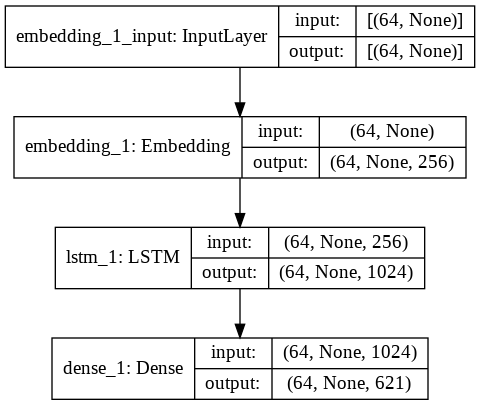

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

**Для каждого символа модель ищет эмбеддинг, запускает GRU один раз с встраиванием в качестве входных данных и применяет плотный слой для генерации логитов, прогнозирующих логарифмическую вероятность следующего символа:**

# Тестируем модель

In [ ]:
for input_example_batch, target_example_batch in dataset_sequence_batches.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


(64, 200, 621) # (batch_size, sequence_length, vocab_size)


Чтобы получить фактические прогнозы от модели, нам нужно выполнить выборку из выходного распределения, чтобы получить фактические индексы символов. Это распределение определяется логитами по словарю символов.

In [ ]:
print('Prediction for the 1st letter of the batch 1st sequense:')
print(example_batch_predictions[0, 0])

Prediction for the 1st letter of the batch 1st sequense:
tf.Tensor(
[ 2.98991101e-04 -3.87502369e-03 -2.60236184e-03 -2.93428451e-03
  3.14918021e-03  4.92060883e-03  2.79476657e-03 -1.97114376e-03
 -1.30666536e-04 -1.49570114e-03  2.43614428e-03  2.27998616e-03
 -1.30178826e-03  5.54774376e-03  3.08590895e-03 -9.86080267e-04
  1.50268304e-03 -2.99866265e-03 -1.01657514e-03  4.87593189e-03
 -4.49503481e-04 -1.79911801e-03  1.24534068e-04  6.58794830e-04
 -7.70085491e-04  9.53916693e-04  3.49782640e-03 -1.47327268e-03
  2.26211408e-03 -2.15314329e-03  1.84845319e-03  3.44589050e-03
 -6.85885083e-04  1.71352027e-03  3.17085790e-03  3.12739215e-03
 -2.84106261e-03 -7.71969650e-03 -1.38825155e-04  8.94216821e-04
 -2.10741651e-04  2.91413721e-03 -5.80270821e-03 -1.47921382e-03
 -4.88039805e-03 -2.88639474e-03 -2.72362493e-03  9.28079302e-04
  9.65475861e-04  3.64477187e-03 -4.46094992e-03  1.62991998e-03
  2.81592715e-03  6.78999932e-04  1.27224997e-03 -2.22425035e-04
  3.57702404e-04 -6.35

In [ ]:
# Quick overview of how tf.random.categorical() works.

# logits is 2-D Tensor with shape [batch_size, num_classes].
# Each slice [i, :] represents the unnormalized log-probabilities for all classes.
# In the example below we say that the probability for class "0" is low but the
# probability for class "2" is much higher.
tmp_logits = [
  [-0.95, 0, 0.95],
];

# Let's generate 5 samples. Each sample is a class index. Class probabilities 
# are being taken into account (we expect to see more samples of class "2").
tmp_samples = tf.random.categorical(
    logits=tmp_logits,
    num_samples=5
)

print(tmp_samples)

tf.Tensor([[2 1 1 2 1]], shape=(1, 5), dtype=int64)


In [ ]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)

sampled_indices.shape

TensorShape([200, 1])

In [ ]:
sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()

sampled_indices.shape

(200,)

In [ ]:
sampled_indices

array([125, 435, 293, 234, 229, 216, 158, 194, 290, 203, 451, 177,  36,
       154, 572, 410, 567, 461,   0, 210, 465, 286, 152,   2, 341,  18,
        46, 581, 402, 332, 208, 495,  58, 473, 617, 576, 371, 337, 389,
        78, 105, 382, 324, 110, 257,  62, 299, 503, 584, 448, 417, 556,
       524, 539, 438,  97, 402,   0,  74, 511, 387, 429, 130, 214, 277,
       341,  72, 222, 305, 421, 210, 493, 565, 237, 323, 479, 423, 190,
       538, 312, 289, 121, 226, 145, 567, 390, 402, 498, 121, 409, 527,
       425, 253, 359, 336, 228, 234, 220, 219, 115, 356,  64, 158,  54,
        15, 448,  36, 114, 370,  30, 439, 418, 252, 125,  86, 295, 261,
       171, 365, 411, 182, 289, 410, 142, 542, 106, 417, 505, 369, 212,
       323,  17, 612, 259,  64, 518, 502, 411,  10, 608, 257, 146, 214,
        74, 593, 583, 202, 463,   5, 159, 369,  80, 396, 405, 199,  36,
        24, 218, 249, 110, 424, 365, 300, 592, 474, 214, 137, 214, 191,
       175, 159,  68, 125,  62, 207, 376, 441, 555, 188, 168, 25

In [ ]:
print('Input:\n', repr(''.join(index2char[input_example_batch[0]])))
print()
print('Next char prediction:\n', repr(''.join(index2char[sampled_indices])))

Input:
 "ut this time, Russian Nostraticists, notably Sergei Starostin, constructed a revised version of Nostratic. It was slightly larger than Greenberg's grouping but it also excluded Afroasiatic.\n\nRecently,"

Next char prediction:
 'áコتаПψđɔاαレŚBĆ胜‡维义\tο介װă ಮ0L虚\u200eவκ哪X全태莲สை์m»ูனÅш]ر姚覺ャ₱澤心普ゼ£\u200e\ti射่りæυנಮgЗف™ο吹禪гந前−ư昭يإÜМö维ზ\u200e地Ü†探♠фบேОаДВÍท_đT-ャBËศ<ソ℃уáuحьńย•šإ‡ó李¼₱孤วςந/马ъ_師大•(門шøυi辞装Π乡#ėวoṣ‘ʿB6БрÅ≠ยس軽六υíυǔőėcá]ιาチ潭žļтக黄ηὶ,ง°f農țḩف解ムБłÉăร'


In [ ]:
for i, (input_idx, sample_idx) in enumerate(zip(input_example_batch[0][:5], sampled_indices[:5])):
    print('Prediction #{:1d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  next predicted: {} ({:s})'.format(target_idx, repr(index2char[sample_idx])))
    print()

Prediction #0
  input: 86 ('u')
  next predicted: 73 ('á')

Prediction #1
  input: 85 ('t')
  next predicted: 73 ('コ')

Prediction #2
  input: 2 (' ')
  next predicted: 73 ('ت')

Prediction #3
  input: 85 ('t')
  next predicted: 73 ('а')

Prediction #4
  input: 73 ('h')
  next predicted: 73 ('П')



# Обучаем модель 
**На этом этапе проблема может рассматриваться как стандартная проблема классификации. Учитывая предыдущее состояние RNN и ввод этого временного шага, спрогнозируем класс следующего символа.**

# Добавим оптимизатор и функцию потерь

In [ ]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )

example_batch_loss = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 200, 621)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       6.4310913


In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

# Добавим контрольные точки

In [ ]:
# %rm -rf tmp/checkpoints
import os
# Directory where the checkpoints will be saved.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [ ]:
EPOCHS=150
STEPS_PER_EPOCH = 10

In [ ]:
tmp_dataset = dataset_sequence_batches.repeat()
    
history = model.fit(
    x=tmp_dataset.as_numpy_iterator(),
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=[
        checkpoint_callback
    ]
)

Epoch 1/150
10/10 [==============================] - 184s 17s/step - loss: 4.3162
Epoch 2/150
10/10 [==============================] - 167s 17s/step - loss: 3.3461
Epoch 3/150
10/10 [==============================] - 168s 17s/step - loss: 3.2776
Epoch 4/150
10/10 [==============================] - 171s 17s/step - loss: 3.3073
Epoch 5/150
10/10 [==============================] - 168s 17s/step - loss: 3.2036
Epoch 6/150
10/10 [==============================] - 171s 17s/step - loss: 3.1265
Epoch 7/150
10/10 [==============================] - 169s 17s/step - loss: 3.0711
Epoch 8/150
10/10 [==============================] - 166s 17s/step - loss: 3.0204
Epoch 9/150
10/10 [==============================] - 162s 16s/step - loss: 2.9296
Epoch 10/150
10/10 [==============================] - 163s 16s/step - loss: 2.9368
Epoch 11/150
10/10 [==============================] - 164s 16s/step - loss: 3.0514
Epoch 12/150
10/10 [==============================] - 164s 16s/step - loss: 2.8151
Epoch 13/150
